In [1]:
import cv2
import numpy as np
import openslide
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu
from scipy import ndimage
import matplotlib.pyplot as plt

In [21]:
wsi_path = "/home/sakulaki/yolo-yuli/one_stop_test/yantian_tif/tif/2018-07-29-04_03_58.tif"

level = 4
slide = openslide.OpenSlide(wsi_path)
print(slide.level_count)
print(slide.level_dimensions)
downsample = slide.level_downsamples[level]
print(slide.level_dimensions[level], slide.level_downsamples[level])

img_rgb = np.asarray(slide.read_region((0, 0), level, slide.level_dimensions[level]).convert('RGB'))
slide.close()
print(img_rgb.shape)

7
((61996, 69318), (30998, 34659), (15499, 17329), (7749, 8664), (3874, 4332), (1937, 2166), (968, 1083))
(3874, 4332) 16.00224130755931
(4332, 3874, 3)


(8664, 7749)


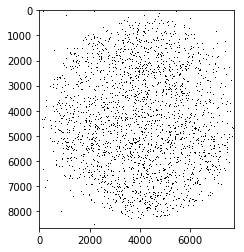

In [3]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# img_gray = np.transpose(img_gray, axes=[1, 0])
print(img_gray.shape)

tissue_mask = img_gray > threshold_otsu(img_gray)
plt.imshow(tissue_mask, cmap="gray")

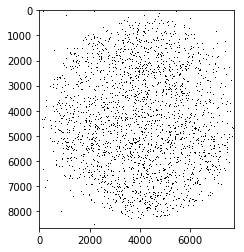

In [18]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)
img = np.array(tissue_mask * 255, dtype=np.uint8)
plt.imshow(img, cmap="gray")

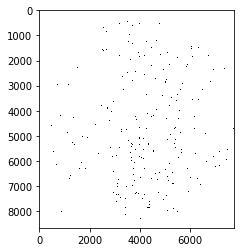

In [15]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

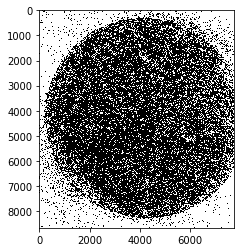

In [19]:
erosion = cv2.erode(dilation,kernel,iterations = 5)
plt.imshow(erosion, cmap="gray")

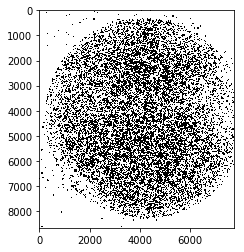

In [7]:
img_open = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
plt.imshow(img_open, cmap="gray")

In [8]:
img2, contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(img2.shape)

(8664, 7749)


In [12]:
cnt = contours[0]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
print("Center: {}; Radius: {}".format(center, radius))

Center: (3874, 4331); Radius: 5811


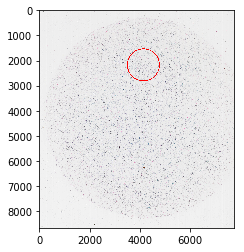

In [13]:
img3=cv2.circle(img_rgb,center,radius,(255,0,0),30)
plt.imshow(img3, cmap="gray")

In [11]:
# calculate circle position and radius
CENTER_X = int(center[1] * downsample)
CENTER_Y = int(center[0] * downsample)
RADIUS = int(radius * downsample)
print((CENTER_X, CENTER_Y), RADIUS)

(17425, 33202) 5088
